In [ ]:
import numpy as np
import pandas as pd
data=pd.read_csv('/content/material_data_Alankar.txt')
data.head()

,Elements,Atomic_Number,Electronegativity,Atomic_Radius,Thermal_Conductivity,Density,Crystal_System
0,H,1,2.20,0.25,0.1805,0.09,HEX
1,He,2,0.00,1.20,0.1513,0.18,HCP
2,Li,3,0.98,1.45,85.0000,530.00,BCC
3,Be,4,1.57,1.05,190.0000,1850.00,HCP
4,B,5,2.04,0.85,27.0000,2340.00,RHO


In [ ]:
class_1 = 'FCC'
class_2 = 'HCP'

# Create a new binary target variable
data['binary_target'] = data['Crystal_System'].apply(lambda x: 1 if x == class_1 else (0 if x == class_2 else None))

# Drop rows with None values in the new binary target variable
# data.dropna(subset=['binary_target'], inplace=True)

# Splitting data into predictor variables (X) and binary target variable (Y)
X = data[['Atomic_Number', 'Electronegativity', 'Atomic_Radius','Density']]  # List all predictor variables here
Y =  pd.DataFrame(data['binary_target'])

In [ ]:
X

,Atomic_Number,Electronegativity,Atomic_Radius,Density
1,2,0.00,1.20,0.18
3,4,1.57,1.05,1850.00
9,10,0.00,1.60,0.90
11,12,1.31,1.50,1740.00
12,13,1.61,1.25,2700.00
17,18,0.00,0.71,1.78
19,20,1.00,1.80,1550.00
20,21,1.36,1.60,2990.00
21,22,1.54,1.40,4540.00
26,27,1.88,1.35,8900.00


In [ ]:
X.shape

(51, 4)

In [ ]:
Y

,binary_target
1,0
3,0
9,1
11,0
12,1
17,1
19,1
20,0
21,0
26,0


In [ ]:
Y.shape

(51, 1)

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
model=linear_model.LogisticRegression()
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
model.fit(X_train,Y_train)
Y_predicted=model.predict(X_test)
Y_predicted=pd.DataFrame(Y_predicted)
Y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,1
9,0


In [ ]:
Y_test

,binary_target
80,0
76,1
85,1
29,0
56,0
65,0
42,0
66,0
11,0
64,0


Text(0, 0.5, 'Y_test')

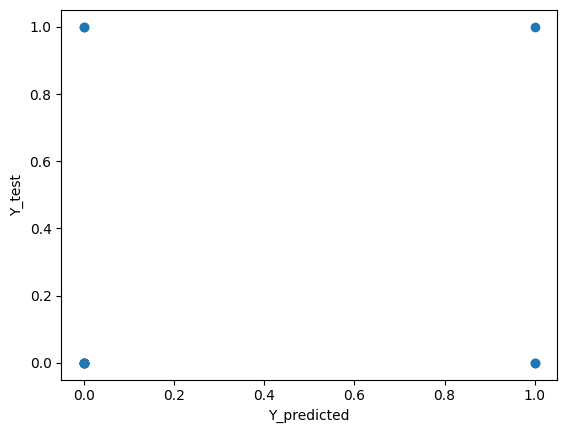

In [ ]:
plt.scatter(Y_predicted,Y_test)
plt.xlabel('Y_predicted')
plt.ylabel("Y_test")